# Extracting named entities

So far we have seen 
    1. manual way to create the chunk
       1. ChunkRule
       2. StripRule
       3. MergeRule
       4. SplitRule
       5. ExpandLeftRule
       6. ExpandRightRule
       7. UnchunkRule
    2. Instead we creating the manual rule we learn to create to chunk based on existing data.
       1. Tagged based Chunk
       2. Classification based chunk

1. Now we are going to extract the entity like Person,Organization,Location.
2. Chunk we have B-NP and I-NP tags .
3. Now we will have the tag like Person,Organization,Location 
4. These are not limited we can have tag like date,price etc.


## ne_chunk

nltk comes with pre-trained named entity chunker called ne_chunk

In [1]:
from nltk.corpus import treebank_chunk
from nltk.chunk import ne_chunk

In [13]:
treebank_chunk.tagged_sents()[0]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

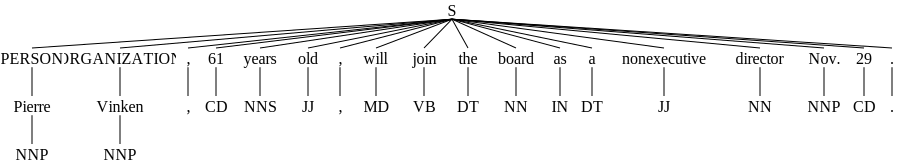

In [6]:
ne_chunk(treebank_chunk.tagged_sents()[0])

In [7]:
tree = ne_chunk(treebank_chunk.tagged_sents()[0])

In [9]:
help(tree.subtrees)

Help on method subtrees in module nltk.tree.tree:

subtrees(filter=None) method of nltk.tree.tree.Tree instance
    Generate all the subtrees of this tree, optionally restricted
    to trees matching the filter function.
    
        >>> t = Tree.fromstring("(S (NP (D the) (N dog)) (VP (V chased) (NP (D the) (N cat))))")
        >>> for s in t.subtrees(lambda t: t.height() == 2):
        ...     print(s)
        (D the)
        (N dog)
        (V chased)
        (D the)
        (N cat)
    
    :type filter: function
    :param filter: the function to filter all local trees



In [10]:
def sub_leaves(tree,label):
    return [t.leaves() for t in tree.subtrees(lambda s: s.label() == label)]

In [11]:
sub_leaves(tree,"PERSON")

[[('Pierre', 'NNP')]]

In [12]:
sub_leaves(tree,"ORGANIZATION")

[[('Vinken', 'NNP')]]

## How it works

1. There is no special in Named Entity Recognition. it use the same approach is used in the pervious tagger when we employed to find the chunk.
2. Previously our target is B-NP,I-NP
3. Now our target is B-Person,I-Person,B-ORGANIZATION,I-ORGANIZATION and more
4. it also "O tag" to indicated the not part of named entity.

## ne_chunk_sents

To process the multiple sentence at once.

In [14]:
from nltk.chunk import ne_chunk_sents
trees =  ne_chunk_sents(treebank_chunk.tagged_sents()[:10])

In [15]:
[sub_leaves(t,"ORGANIZATION") for t in trees]

[[[('Vinken', 'NNP')]],
 [[('Elsevier', 'NNP')]],
 [[('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP')]],
 [],
 [],
 [[('Inc.', 'NNP')], [('Micronite', 'NN')]],
 [[('New', 'NNP'), ('England', 'NNP'), ('Journal', 'NNP')]],
 [[('Lorillard', 'NNP')]],
 [],
 []]

## Binary named entity

1. if we don't worry about the PERSON,ORGANIZATION,LOCATION to extract .
2. If we are interest only about the named entity instead of particular named entity .
3. we can set binary =True

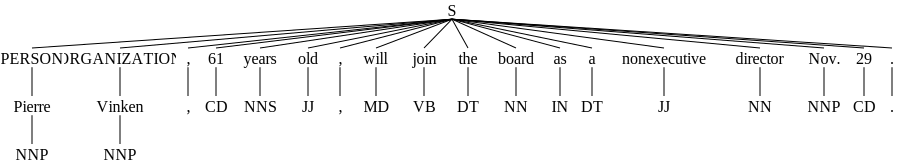

In [17]:
ne_chunk(treebank_chunk.tagged_sents()[0])

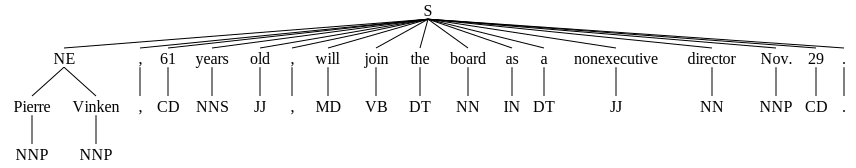

In [18]:
ne_chunk(treebank_chunk.tagged_sents()[0],binary=True)
#? all entity will be named as "NE"